# 1) Intro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
import pandas as pd
import os
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
path = os.path.join(os.path.curdir,"../Dataset/Dataset2.csv")
data = pd.read_csv(path)
X = np.array(data)

In [3]:
def plt_dbscan(X, labels):
    K = set(labels)
    plt.gcf().clf()
    cmap = plt.cm.rainbow
    
    for k in K:
        x = X[labels==k]
        plt.scatter(x[:, 0], x[:, 1],
                       cmap=cmap,
                       marker='o',
                       s=8**2,
                       linewidths=1,)
    plt.grid(False)            

# 2) Clustring data with DBSCAN

## One cluster without anomaly detection

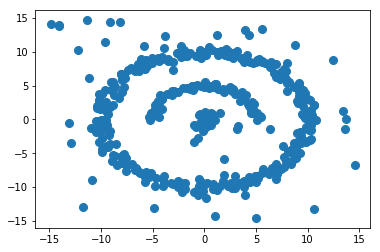

In [4]:
clustering = DBSCAN(eps=6, min_samples=3).fit(X)
labels = clustering.labels_
plt_dbscan(X, labels)

## One cluster with anomaly detection

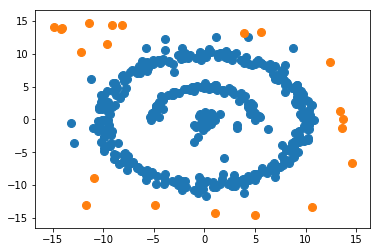

In [5]:
clustering = DBSCAN(eps=2.8, min_samples=7).fit(X)
labels = clustering.labels_
plt_dbscan(X, labels)

## Best possible way

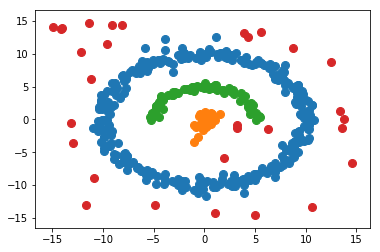

In [6]:
clustering = DBSCAN(eps=2, min_samples=12).fit(X)
labels = clustering.labels_
plt_dbscan(X, labels)

# 3) Evaluation

## 1. Dataset1, k = 2

In [7]:
def initialize_centers(X, K):
    m, n = X.shape
    # choosing K out of m data points and each points can
    rand_i = np.random.choice(m, K, replace=False)
    centroids = X[rand_i, :]
    return centroids


def find_closest_centers(X, centroids):
    m = X.shape[0]
    idx = np.zeros(m, dtype=int)

    for i in range(m):
        # Euclidean distances
        errs = np.sum(np.square(centroids - X[i, :]), axis=1)
        idx[i] = np.argmin(errs)

    return idx

def compute_means(X, idx, K):
    n = X.shape[1]
    centroids = np.zeros((K, n))
    for k in range(K):
        # data points in each cluster
        x = X[idx == k]
        centroids[k, :] = np.mean(x, axis=0)

    return centroids

def kmeans(X, K, epoch=15):
    centers = initialize_centers(X, K)
    
    idx = None
    visual = None
    for j in range(epoch):
        idx = find_closest_centers(X, centers)
        centers = compute_means(X, idx, K)
        
    return centers, idx

dbscan_score:  0.6960996811642881


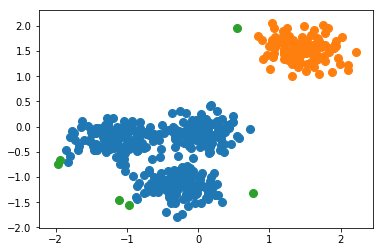

In [8]:
data = pd.read_csv("../Dataset/Dataset1.csv")
X = np.array(data)
dbscan_clustering = DBSCAN(eps=0.45, min_samples=60).fit(X)
dbscan_labels = dbscan_clustering.labels_
plt_dbscan(X, dbscan_labels)
X_clean = X[dbscan_labels != -1]
labels_clean = dbscan_labels[dbscan_labels != -1]
dbscan_score = silhouette_score(X_clean, labels_clean)
print("dbscan_score: ", dbscan_score)

kmeans_score:  0.6927062018628728


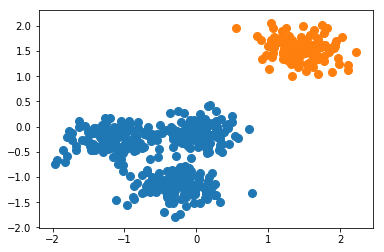

In [9]:
_, kmeans_labels = kmeans(X, 2, 15)
plt_dbscan(X, kmeans_labels)
kmeans_score = silhouette_score(X, kmeans_labels)
print("kmeans_score: ", kmeans_score)

## 2. Dataset1, k = 4

dbscan_score:  0.733469271307732


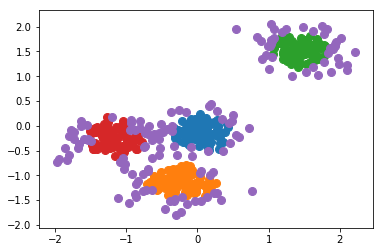

In [10]:
dbscan_clustering = DBSCAN(eps=0.18, min_samples=20).fit(X)
dbscan_labels = dbscan_clustering.labels_
plt_dbscan(X, dbscan_labels)
X_clean = X[dbscan_labels != -1]
labels_clean = dbscan_labels[dbscan_labels != -1]
dbscan_score = silhouette_score(X_clean, labels_clean)
print("dbscan_score: ", dbscan_score)

kmeans_score:  0.6460418611389754


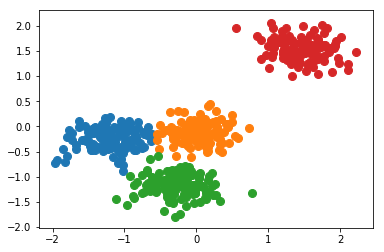

In [11]:
_, kmeans_labels = kmeans(X, 4, 15)
plt_dbscan(X, kmeans_labels)
kmeans_score = silhouette_score(X, kmeans_labels)
print("kmeans_score: ", kmeans_score)

## 3. Dataset2, k=3

In [12]:
path = os.path.join(os.path.curdir,"../Dataset/Dataset2.csv")
data = pd.read_csv(path)
X = np.array(data)

dbscan_score:  -0.1210137031206813


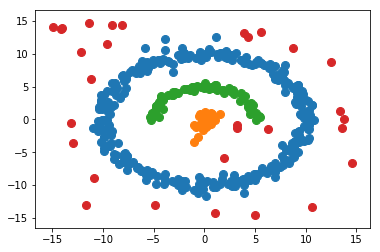

In [13]:
dbscan_clustering = DBSCAN(eps=2, min_samples=12).fit(X)
dbscan_labels = dbscan_clustering.labels_
plt_dbscan(X, dbscan_labels)
X_clean = X[dbscan_labels != -1]
labels_clean = dbscan_labels[dbscan_labels != -1]
dbscan_score = silhouette_score(X_clean, labels_clean)
print("dbscan_score: ", dbscan_score)

kmeans_score:  0.3869850435372966


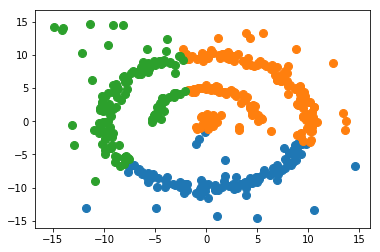

In [14]:
_, kmeans_labels = kmeans(X, 3, 15)
plt_dbscan(X, kmeans_labels)
kmeans_score = silhouette_score(X, kmeans_labels)
print("kmeans_score: ", kmeans_score)